# Non-local quantum gates

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import Aer, execute
import warnings
warnings.filterwarnings("ignore")


def non_local_cx(quantum_circuit,ctrl_qubit,tgt_qubit, comm_qubits, classical_register):
    quantum_circuit.h(comm_qubits[0])
    quantum_circuit.cx(comm_qubits[0], comm_qubits[1])
    quantum_circuit.cx(ctrl_qubit, comm_qubits[0])
    quantum_circuit.measure(comm_qubits[0], c[0])
    quantum_circuit.cx(comm_qubits[1], tgt_qubit)
    quantum_circuit.h(comm_qubits[1])
    quantum_circuit.measure(comm_qubits[1], c[1])
    quantum_circuit.z(ctrl_qubit).c_if(c[1], 1)
    quantum_circuit.x(tgt_qubit).c_if(c[0], 1)
    quantum_circuit.reset(comm_qubits[0])
    quantum_circuit.reset(comm_qubits[1])
    return quantum_circuit

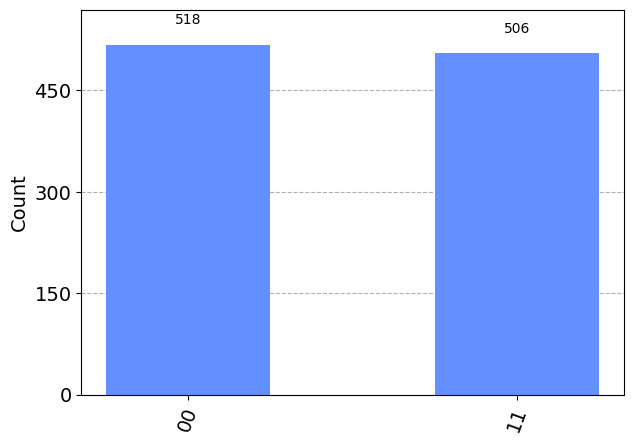

In [3]:
q,c = QuantumRegister(2,'q'), ClassicalRegister(2,'c')
qc = QuantumCircuit(q)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024) 
hist = job.result().get_counts()
plot_histogram(hist)


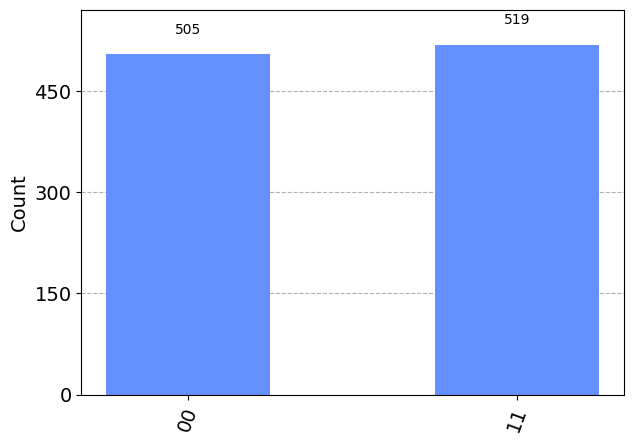

In [4]:
#Execute the distributed quantum circuit, remove the measured communication qubits

def get_hist(circuit, qubits, n_shots):
    hist, hist_dict = execute(circuit, Aer.get_backend('qasm_simulator'), shots=n_shots).result().get_counts(), {}
    for key in hist:
        hist_dict[key.split(" ")[0][::-1][0:qubits]] = 0
    for key in hist:
        hist_dict[key.split(" ")[0][::-1][0:qubits]] = hist_dict[key.split(" ")[0][::-1][0:qubits]] + hist[key]
    hist = {k: v for total in (sum(hist_dict.values(), 0.0),) for k, v in hist_dict.items()}
    return hist

# Distributed quantum gates
q = QuantumRegister(qc.num_qubits + 2, 'q')
c = ClassicalRegister(4, 'c')
quantum_circuit = QuantumCircuit(q, c)
quantum_circuit.h(0)
quantum_circuit = non_local_cx(quantum_circuit, 0, 1,[2, 3], c)

quantum_circuit.measure_all()
hist = get_hist(quantum_circuit, 2, 1024)
plot_histogram(hist)